### Import libraries

In [64]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import plot_partial_dependence, permutation_importance
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import sys
import datetime
from datetime import date, timedelta
from tqdm.notebook import tqdm
import pickle

### Read Datasets

In [65]:
inflow_df = pd.read_csv('../../dataset/reservoir_dataset_engg.csv')
inflow_df = inflow_df[inflow_df['RESERVOIR'] == 'K.R.S']
print(inflow_df.shape)
inflow_df.head()

(3274, 10)


,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,K.R.S,46.42,122.59,2029.0,2000.0,2011,1,1,0,WINTER
1,K.R.S,46.54,122.68,3084.0,1490.0,2011,1,2,1,WINTER
2,K.R.S,46.64,122.75,2776.0,1491.0,2011,1,3,2,WINTER
3,K.R.S,46.69,122.79,2311.0,1491.0,2011,1,4,3,WINTER
4,K.R.S,46.70,122.80,1847.0,1491.0,2011,1,5,4,WINTER


In [66]:
weather_df = pd.read_csv('../../dataset/Weather/mysuru_kodagu_hassan_weather.csv')
print(weather_df.shape)
weather_df.head()

(12783, 35)


,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,heavy intensity drizzle,very heavy rain,thunderstorm with heavy rain,thunderstorm with rain,thunderstorm,proximity shower rain,thunderstorm with light rain,shower rain,light intensity shower rain,light thunderstorm
0,2010-01-01,Hassan,21.77,22.02,17.22,26.35,1013.50,77.92,2.81,89.33,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-01,Kodagu,23.90,24.71,20.06,31.39,1012.17,83.50,1.55,104.21,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-01,Mysuru,24.18,24.51,18.82,30.30,1012.92,68.42,2.62,90.38,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-02,Hassan,20.73,20.80,14.47,27.35,1015.25,73.75,2.42,70.29,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-02,Kodagu,23.56,24.41,19.18,31.88,1014.08,78.38,1.41,112.46,...,0,0,0,0,0,0,0,0,0,0


In [67]:
weather_df['YYYY'] = weather_df['date'].str[:4].astype(int)
weather_df['MM'] = weather_df['date'].str[5:7].astype(int)
weather_df['DD'] = weather_df['date'].str[8:].astype(int)
weather_df

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,thunderstorm with rain,thunderstorm,proximity shower rain,thunderstorm with light rain,shower rain,light intensity shower rain,light thunderstorm,YYYY,MM,DD
0,2010-01-01,Hassan,21.77,22.02,17.22,26.35,1013.50,77.92,2.81,89.33,...,0,0,0,0,0,0,0,2010,1,1
1,2010-01-01,Kodagu,23.90,24.71,20.06,31.39,1012.17,83.50,1.55,104.21,...,0,0,0,0,0,0,0,2010,1,1
2,2010-01-01,Mysuru,24.18,24.51,18.82,30.30,1012.92,68.42,2.62,90.38,...,0,0,0,0,0,0,0,2010,1,1
3,2010-01-02,Hassan,20.73,20.80,14.47,27.35,1015.25,73.75,2.42,70.29,...,0,0,0,0,0,0,0,2010,1,2
4,2010-01-02,Kodagu,23.56,24.41,19.18,31.88,1014.08,78.38,1.41,112.46,...,0,0,0,0,0,0,0,2010,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12778,2021-08-30,Kodagu,20.07,20.57,19.03,23.77,1009.00,93.50,1.71,241.83,...,0,0,0,0,0,0,0,2021,8,30
12779,2021-08-30,Mysuru,22.36,22.90,19.59,28.21,1009.33,82.33,5.38,253.62,...,0,0,0,0,0,0,0,2021,8,30
12780,2021-08-31,Hassan,21.86,22.21,18.87,26.31,1009.29,82.17,3.39,249.33,...,0,0,0,0,0,0,0,2021,8,31
12781,2021-08-31,Kodagu,21.29,21.81,19.03,26.23,1009.79,89.21,1.78,245.88,...,0,0,0,0,0,0,0,2021,8,31


In [68]:
kodagu_df = weather_df[weather_df['city_name'] == 'Kodagu'].reset_index(drop=True)
hassan_df = weather_df[weather_df['city_name'] == 'Hassan'].reset_index(drop=True)
mysuru_df = weather_df[weather_df['city_name'] == 'Mysuru'].reset_index(drop=True)

print(kodagu_df.shape, hassan_df.shape, mysuru_df.shape)

(4261, 38) (4261, 38) (4261, 38)


### Check Coorelation

In [69]:
m = mysuru_df.copy()
m = m.merge(inflow_df, how='outer', left_on=['YYYY', 'MM', 'DD'], right_on=['YEAR', 'MONTH', 'DATE'])
assert m.shape[0] == 4261
m.head(2)

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,2010-01-01,Mysuru,24.18,24.51,18.82,30.30,1012.92,68.42,2.62,90.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,Mysuru,23.21,23.24,16.74,29.32,1014.58,64.33,2.19,71.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
h = hassan_df.copy()
h = h.merge(inflow_df, how='outer', left_on=['YYYY', 'MM', 'DD'], right_on=['YEAR', 'MONTH', 'DATE'])
assert h.shape[0] == 4261
h.head(2)

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,2010-01-01,Hassan,21.77,22.02,17.22,26.35,1013.50,77.92,2.81,89.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,Hassan,20.73,20.80,14.47,27.35,1015.25,73.75,2.42,70.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
k = kodagu_df.copy()
k = k.merge(inflow_df, how='outer', left_on=['YYYY', 'MM', 'DD'], right_on=['YEAR', 'MONTH', 'DATE'])
assert k.shape[0] == 4261
k.head(2)

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,SEASON
0,2010-01-01,Kodagu,23.90,24.71,20.06,31.39,1012.17,83.50,1.55,104.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,Kodagu,23.56,24.41,19.18,31.88,1014.08,78.38,1.41,112.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


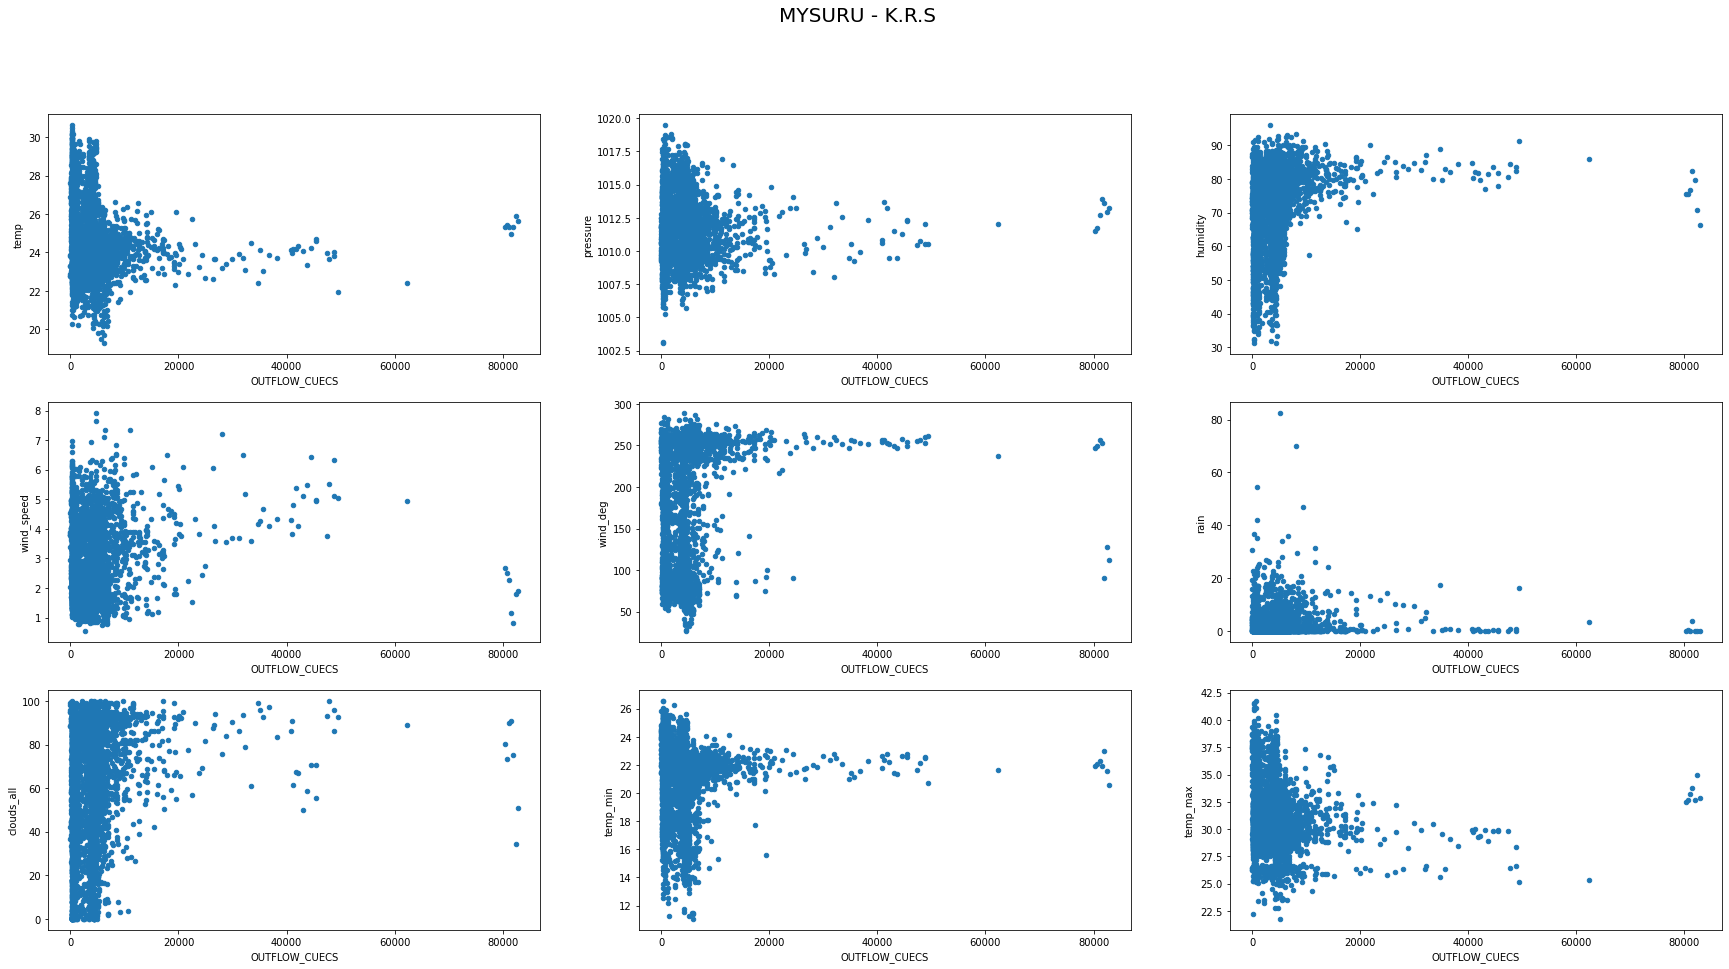

In [72]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
m.plot(x='OUTFLOW_CUECS', y='temp', kind='scatter', ax=ax[0][0], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='pressure', kind='scatter', ax=ax[0][1], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='humidity', kind='scatter', ax=ax[0][2], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='wind_speed', kind='scatter', ax=ax[1][0], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='wind_deg', kind='scatter', ax=ax[1][1], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='rain', kind='scatter', ax=ax[1][2], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='clouds_all', kind='scatter', ax=ax[2][0], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='temp_min', kind='scatter', ax=ax[2][1], subplots=True)
m.plot(x='OUTFLOW_CUECS', y='temp_max', kind='scatter', ax=ax[2][2], subplots=True)
fig.suptitle('MYSURU - K.R.S', fontsize=20)
plt.show()

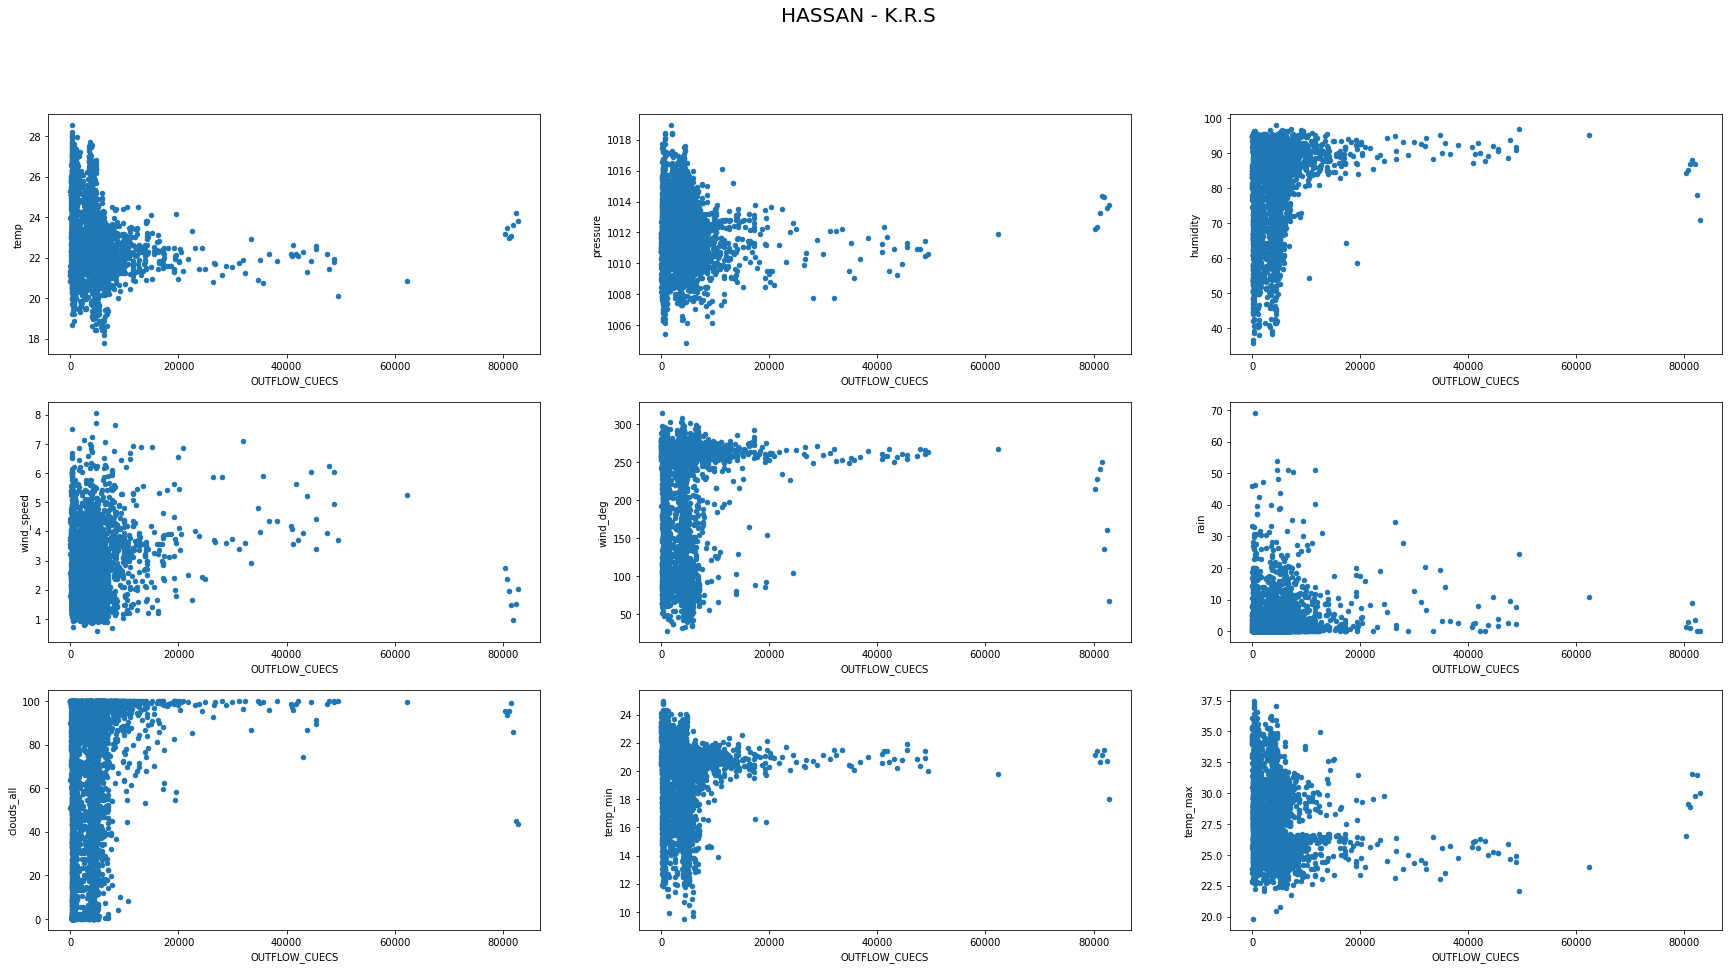

In [73]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
h.plot(x='OUTFLOW_CUECS', y='temp', kind='scatter', ax=ax[0][0], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='pressure', kind='scatter', ax=ax[0][1], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='humidity', kind='scatter', ax=ax[0][2], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='wind_speed', kind='scatter', ax=ax[1][0], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='wind_deg', kind='scatter', ax=ax[1][1], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='rain', kind='scatter', ax=ax[1][2], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='clouds_all', kind='scatter', ax=ax[2][0], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='temp_min', kind='scatter', ax=ax[2][1], subplots=True)
h.plot(x='OUTFLOW_CUECS', y='temp_max', kind='scatter', ax=ax[2][2], subplots=True)
fig.suptitle('HASSAN - K.R.S', fontsize=20)
plt.show()

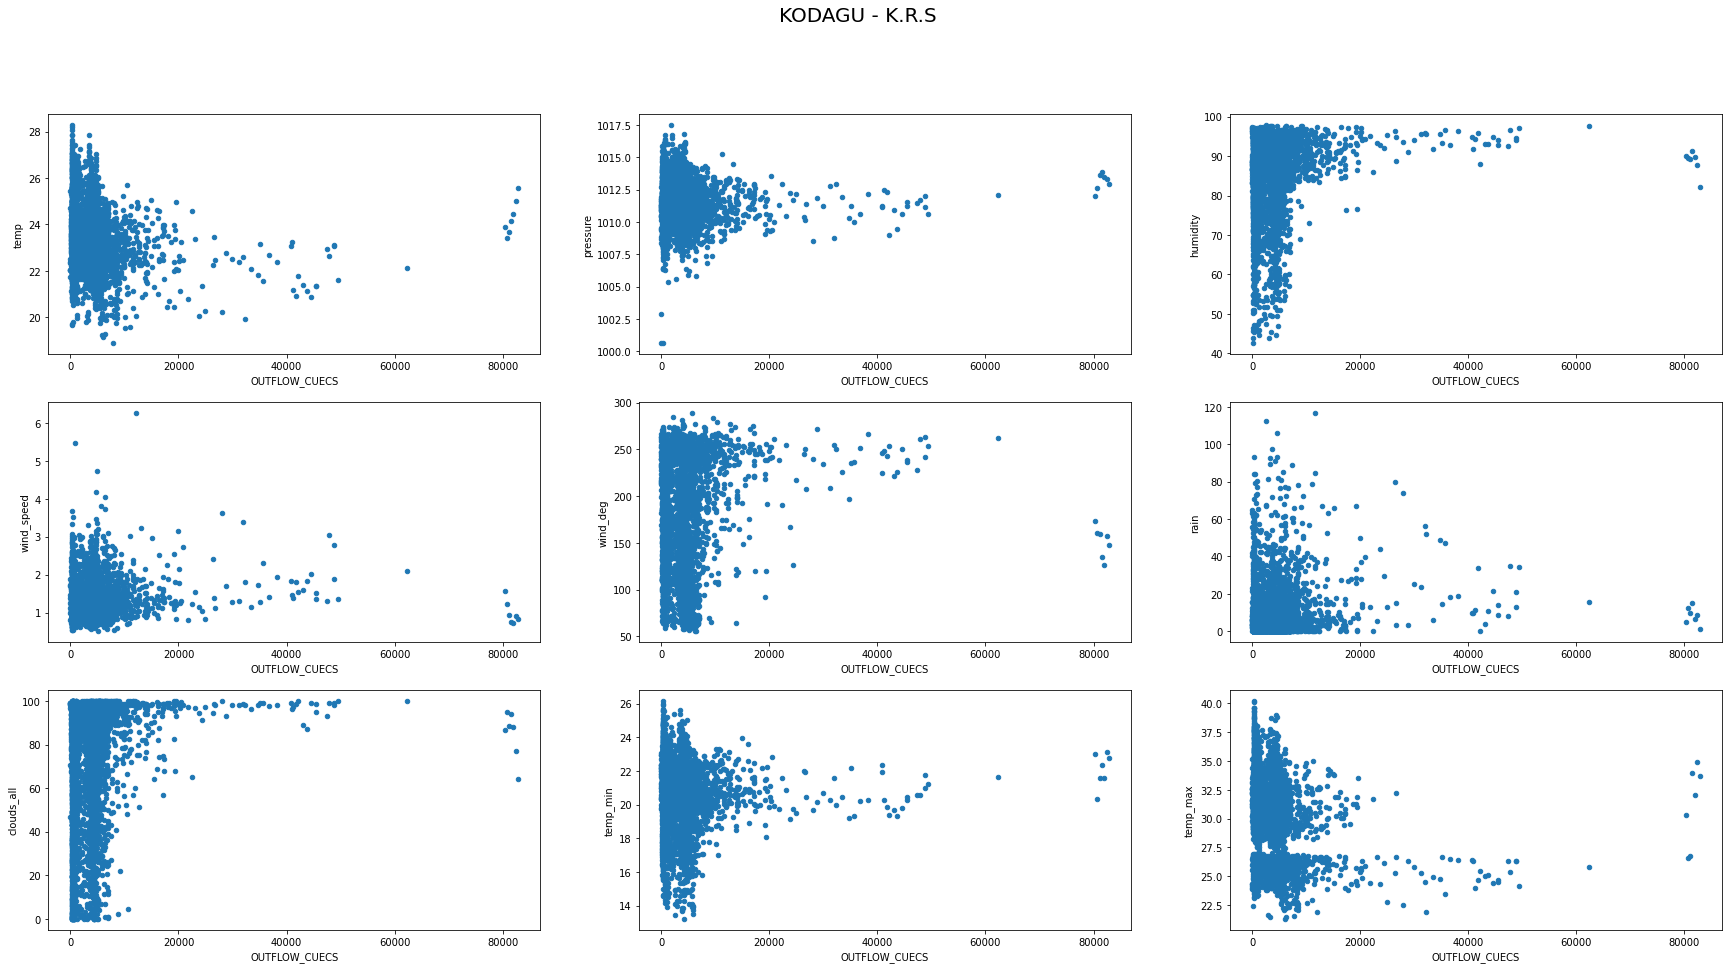

In [74]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 15))
k.plot(x='OUTFLOW_CUECS', y='temp', kind='scatter', ax=ax[0][0], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='pressure', kind='scatter', ax=ax[0][1], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='humidity', kind='scatter', ax=ax[0][2], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='wind_speed', kind='scatter', ax=ax[1][0], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='wind_deg', kind='scatter', ax=ax[1][1], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='rain', kind='scatter', ax=ax[1][2], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='clouds_all', kind='scatter', ax=ax[2][0], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='temp_min', kind='scatter', ax=ax[2][1], subplots=True)
k.plot(x='OUTFLOW_CUECS', y='temp_max', kind='scatter', ax=ax[2][2], subplots=True)
fig.suptitle('KODAGU - K.R.S', fontsize=20)
plt.show()

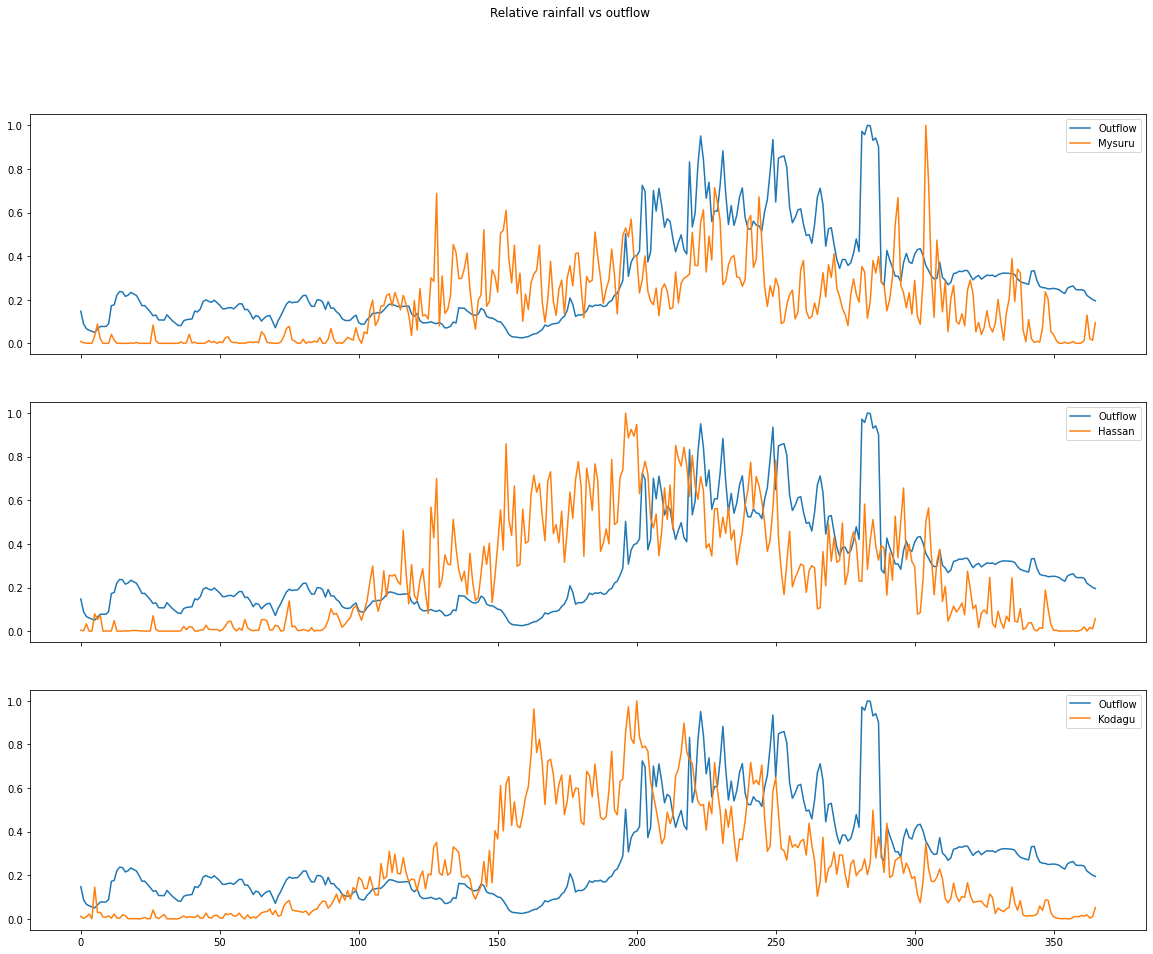

In [76]:
m.rename(columns={'rain': 'mysuru_rain'}, inplace=True)
h.rename(columns={'rain': 'hassan_rain'}, inplace=True)
k.rename(columns={'rain': 'kodagu_rain'}, inplace=True)
t = m[['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS', 'mysuru_rain']].merge(h[['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS', 'hassan_rain']], on=['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS'], how='inner').merge(k[['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS', 'kodagu_rain']], on=['YYYY', 'DD', 'MM', 'OUTFLOW_CUECS'], how='inner')
g = t.groupby(['MM', 'DD'])[['OUTFLOW_CUECS', 'mysuru_rain', 'hassan_rain', 'kodagu_rain']].mean()

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(20, 15))
ax[0].plot(range(g.shape[0]), g['OUTFLOW_CUECS'].values / g['OUTFLOW_CUECS'].max(), label='Outflow')
ax[0].plot(range(g.shape[0]), g['mysuru_rain'].values / g['mysuru_rain'].max(), label='Mysuru')
ax[1].plot(range(g.shape[0]), g['OUTFLOW_CUECS'].values / g['OUTFLOW_CUECS'].max(), label='Outflow')
ax[1].plot(range(g.shape[0]), g['hassan_rain'].values / g['hassan_rain'].max(), label='Hassan')
ax[2].plot(range(g.shape[0]), g['OUTFLOW_CUECS'].values / g['OUTFLOW_CUECS'].max(), label='Outflow')
ax[2].plot(range(g.shape[0]), g['kodagu_rain'].values / g['kodagu_rain'].max(), label='Kodagu')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.suptitle('Relative rainfall vs outflow')
plt.show()

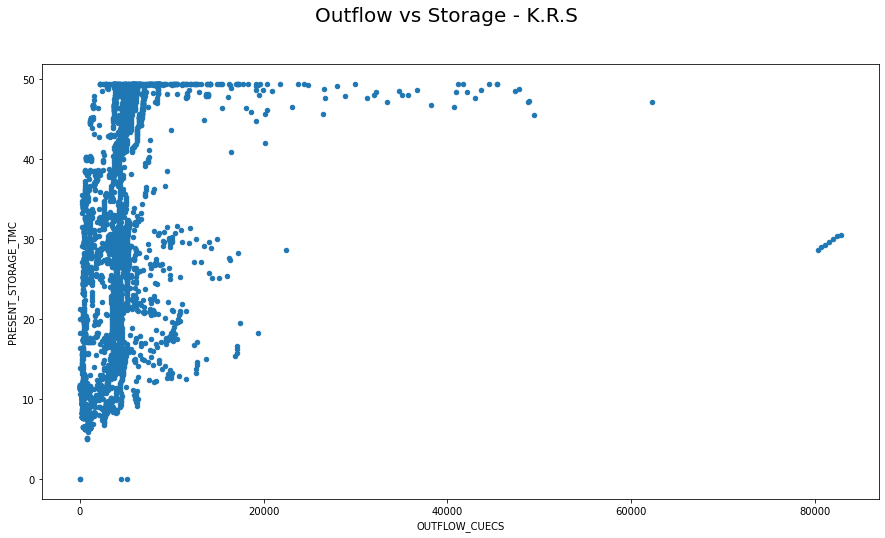

In [77]:
fig, ax = plt.subplots(figsize=(15, 8))
inflow_df.plot(x='OUTFLOW_CUECS', y='PRESENT_STORAGE_TMC', kind='scatter', ax=ax, subplots=True)
fig.suptitle('Outflow vs Storage - K.R.S', fontsize=20)
plt.show()

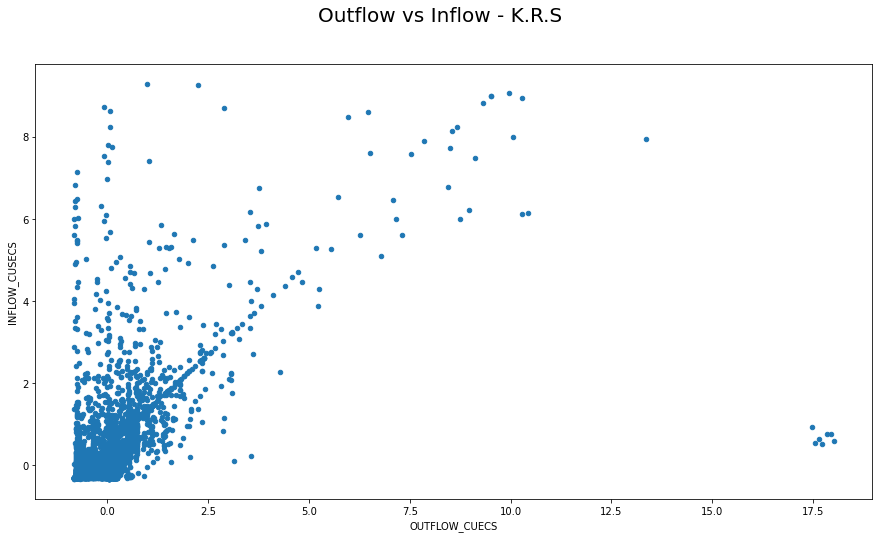

In [93]:
fig, ax = plt.subplots(figsize=(15, 8))
inflow_df.plot(x='OUTFLOW_CUECS', y='INFLOW_CUSECS', kind='scatter', ax=ax, subplots=True)
fig.suptitle('Outflow vs Inflow - K.R.S', fontsize=20)
plt.show()

### Dataset Transformation

In [78]:
inflow_df = inflow_df[['INFLOW_CUSECS', 'OUTFLOW_CUECS', 'YEAR', 'MONTH', 'DATE', 'SEASON']]
inflow_df.head()

,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,SEASON
0,2029.0,2000.0,2011,1,1,WINTER
1,3084.0,1490.0,2011,1,2,WINTER
2,2776.0,1491.0,2011,1,3,WINTER
3,2311.0,1491.0,2011,1,4,WINTER
4,1847.0,1491.0,2011,1,5,WINTER


In [79]:
with open('month_le.pkl', 'rb') as f:
    month_le = pickle.load(f)

with open('date_le.pkl', 'rb') as f:
    date_le = pickle.load(f)

with open('season_le.pkl', 'rb') as f:
    season_le = pickle.load(f)

/home/santanu/python-all/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [80]:
# month_oe = OneHotEncoder().fit(inflow_df[['MONTH']])
# date_oe = OneHotEncoder().fit(inflow_df[['DATE']])
# season_oe = OneHotEncoder().fit(inflow_df[['SEASON']])

In [216]:
rs_outflow = RobustScaler().fit(inflow_df[['OUTFLOW_CUECS']])

with open('encoders/rs_inflow.pkl', 'rb') as f:
    rs_inflow = pickle.load(f)

with open('encoders/rs_temp.pkl', 'rb') as f:
    rs_temp = pickle.load(f)

with open('encoders/rs_feels_like.pkl', 'rb') as f:
    rs_feels_like = pickle.load(f)

with open('encoders/rs_temp_min.pkl', 'rb') as f:
    rs_temp_min = pickle.load(f)

with open('encoders/rs_temp_max.pkl', 'rb') as f:
    rs_temp_max = pickle.load(f)

with open('encoders/rs_pressure.pkl', 'rb') as f:
    rs_pressure = pickle.load(f)

with open('encoders/rs_humidity.pkl', 'rb') as f:
    rs_humidity = pickle.load(f)

with open('encoders/rs_wind_speed.pkl', 'rb') as f:
    rs_wind_speed = pickle.load(f)

with open('encoders/rs_wind_deg.pkl', 'rb') as f:
    rs_wind_deg = pickle.load(f)

with open('encoders/rs_rain.pkl', 'rb') as f:
    rs_rain = pickle.load(f)

with open('encoders/rs_clouds_all.pkl', 'rb') as f:
    rs_clouds_all = pickle.load(f)

# remaining columns will be divided by 24 for scaling purpose.

In [82]:
inflow_df['INFLOW_CUSECS'] = rs_inflow.transform(inflow_df[['INFLOW_CUSECS']]).flatten()
inflow_df['OUTFLOW_CUECS'] = rs_outflow.transform(inflow_df[['OUTFLOW_CUECS']]).flatten()
inflow_df.head()

/home/santanu/python-all/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/home/santanu/python-all/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,SEASON
0,0.073551,-0.380546,2011,1,1,WINTER
1,0.289397,-0.496725,2011,1,2,WINTER
2,0.226382,-0.496498,2011,1,3,WINTER
3,0.131246,-0.496498,2011,1,4,WINTER
4,0.036315,-0.496498,2011,1,5,WINTER


In [83]:
weather_df.columns

Index(['date', 'city_name', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain', 'clouds_all',
       'broken clouds', 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'fog', 'light rain', 'mist', 'haze', 'moderate rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm', 'proximity shower rain', 'thunderstorm with light rain',
       'shower rain', 'light intensity shower rain', 'light thunderstorm',
       'YYYY', 'MM', 'DD'],
      dtype='object')

In [84]:
weather_df['temp'] = rs_temp.transform(weather_df[['temp']]).flatten()
weather_df['feels_like'] = rs_feels_like.transform(weather_df[['feels_like']]).flatten()
weather_df['temp_min'] = rs_temp_min.transform(weather_df[['temp_min']]).flatten()
weather_df['temp_max'] = rs_temp_max.transform(weather_df[['temp_max']]).flatten()
weather_df['pressure'] = rs_pressure.transform(weather_df[['pressure']]).flatten()
weather_df['humidity'] = rs_humidity.transform(weather_df[['humidity']]).flatten()
weather_df['wind_speed'] = rs_wind_speed.transform(weather_df[['wind_speed']]).flatten()
weather_df['wind_deg'] = rs_wind_deg.transform(weather_df[['wind_deg']]).flatten()
weather_df['rain'] = rs_rain.transform(weather_df[['rain']]).flatten()
weather_df['clouds_all'] = rs_clouds_all.transform(weather_df[['clouds_all']]).flatten()
weather_df.loc[:, ('broken clouds', 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'fog', 'light rain', 'mist', 'haze', 'moderate rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm', 'proximity shower rain', 'thunderstorm with light rain',
       'shower rain', 'light intensity shower rain', 'light thunderstorm')] = weather_df.loc[:, ('broken clouds', 'overcast clouds', 'scattered clouds', 'sky is clear',
       'few clouds', 'fog', 'light rain', 'mist', 'haze', 'moderate rain',
       'heavy intensity rain', 'light intensity drizzle', 'drizzle',
       'heavy intensity drizzle', 'very heavy rain',
       'thunderstorm with heavy rain', 'thunderstorm with rain',
       'thunderstorm', 'proximity shower rain', 'thunderstorm with light rain',
       'shower rain', 'light intensity shower rain', 'light thunderstorm')] / 24

In [85]:
weather_df.head()

,date,city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,thunderstorm with rain,thunderstorm,proximity shower rain,thunderstorm with light rain,shower rain,light intensity shower rain,light thunderstorm,YYYY,MM,DD
0,2010-01-01,Hassan,-0.736,-0.737201,-1.281690,-0.657143,0.683274,-0.156784,0.559748,-0.826564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,1
1,2010-01-01,Kodagu,0.116,0.180887,-0.281690,0.242857,0.209964,0.161345,-0.232704,-0.714651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,1
2,2010-01-01,Mysuru,0.228,0.112628,-0.718310,0.048214,0.476868,-0.698404,0.440252,-0.818667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,1
3,2010-01-02,Hassan,-1.152,-1.153584,-2.250000,-0.478571,1.306050,-0.394527,0.314465,-0.969765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,2
4,2010-01-02,Kodagu,-0.020,0.078498,-0.591549,0.330357,0.889680,-0.130559,-0.320755,-0.652602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010,1,2


In [86]:
kodagu_df = weather_df[weather_df['city_name'] == 'Kodagu'].reset_index(drop=True)
hassan_df = weather_df[weather_df['city_name'] == 'Hassan'].reset_index(drop=True)
mysuru_df = weather_df[weather_df['city_name'] == 'Mysuru'].reset_index(drop=True)

In [87]:
train_inflow_df = inflow_df[inflow_df['YEAR'] < 2020].reset_index(drop=True)
val_inflow_df = inflow_df[inflow_df['YEAR'] == 2020].reset_index(drop=True)

train_inflow_df.shape, val_inflow_df.shape

((2944, 6), (330, 6))

In [197]:
def embed_day(df):
    data = {}
    for index in tqdm(df.index):
        row = df.iloc[index]
        inflow = row['INFLOW_CUSECS']
        outflow = row['OUTFLOW_CUECS']
        year = row['YEAR']
        month = row['MONTH']
        date = row['DATE']
        season = row['SEASON']

        ddmmyyyy = datetime.date(year, month, date)
        ddmmyyyy_list = [str(ddmmyyyy + timedelta(days=day)) for day in range(2)]

        sel_kodagu = kodagu_df[kodagu_df['date'].isin(ddmmyyyy_list)].drop(columns=['date', 'city_name', 'YYYY', 'MM', 'DD']).values.flatten()
        sel_hassan = hassan_df[hassan_df['date'].isin(ddmmyyyy_list)].drop(columns=['date', 'city_name', 'YYYY', 'MM', 'DD']).values.flatten()
        sel_mysuru = mysuru_df[mysuru_df['date'].isin(ddmmyyyy_list)].drop(columns=['date', 'city_name', 'YYYY', 'MM', 'DD']).values.flatten()
        
        month_transformed = month_le.transform([month])
        date_transformed = date_le.transform([date])
        season_transformed = season_le.transform([season])
#         month_transformed = month_oe.transform([[month]]).toarray().flatten()
#         date_transformed = date_oe.transform([[date]]).toarray().flatten()
#         season_transformed = season_oe.transform([[season]]).toarray().flatten()
        
        data[ddmmyyyy] = np.concatenate([month_transformed, date_transformed, season_transformed, sel_mysuru, [inflow], [outflow]])
#         data[ddmmyyyy] = np.concatenate([month_transformed, date_transformed, season_transformed, sel_mysuru, sel_kodagu, sel_hassan, [inflow], [outflow]])
    return pd.DataFrame(data).T

In [198]:
train_emb_df = embed_day(train_inflow_df)
val_emb_df = embed_day(val_inflow_df)

In [199]:
train_emb_df.head()

,0,1,2,3,4
2011-01-01,0.0,0.0,2.0,0.073551,-0.380546
2011-01-02,0.0,1.0,2.0,0.289397,-0.496725
2011-01-03,0.0,2.0,2.0,0.226382,-0.496498
2011-01-04,0.0,3.0,2.0,0.131246,-0.496498
2011-01-05,0.0,4.0,2.0,0.036315,-0.496498


### Dataset and DataLoader

In [ ]:
class OutflowDataset(Dataset):
    def __init__(self, df):
        self.df = df
    
    def __getitem__(self, index):
        data = self.df.iloc[index].values
        return torch.FloatTensor(data[:-1]), torch.FloatTensor([data[-1]])
    
    def __len__(self):
        return self.df.shape[0]

In [ ]:
train_ds = OutflowDataset(train_emb_df)
val_ds = OutflowDataset(val_emb_df)
train_dl = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=2)
val_dl = DataLoader(val_ds, batch_size=64, num_workers=2)

### Model

In [201]:
class SimpleMLP(nn.Module):
    def __init__(self, nmonth, ndate, nseason):
        super().__init__()
#         self.month_emb = nn.Embedding(num_embeddings=nmonth, embedding_dim=64)
#         self.date_emb = nn.Embedding(num_embeddings=ndate, embedding_dim=64)
#         self.season_emb = nn.Embedding(num_embeddings=nseason, embedding_dim=64)

        self.dense_1 = nn.Sequential(
                nn.Linear(in_features=1191, out_features=5120),
                nn.LeakyReLU(),
                nn.Linear(in_features=5120, out_features=2048)
        )
        self.dense_2 = nn.Sequential(
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(in_features=2048, out_features=2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(in_features=2048, out_features=2048)
        )
        self.dense_3 = nn.Sequential(
                nn.Linear(in_features=2048, out_features=1024),
                nn.LeakyReLU(),
                nn.Dropout(),
                nn.Linear(in_features=1024, out_features=512),
                nn.LeakyReLU(),
                nn.Linear(in_features=512, out_features=256)
        )
        self.dense_4 = nn.Sequential(
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(in_features=256, out_features=256)
        )
        self.dense_5 = nn.Sequential(
                nn.Linear(in_features=256, out_features=128),
                nn.LeakyReLU(),
                nn.Linear(in_features=128, out_features=64),
                nn.LeakyReLU(),
                nn.Linear(in_features=64, out_features=32),
                nn.LeakyReLU(),
                nn.Linear(in_features=32, out_features=8),
                nn.LeakyReLU(),
                nn.Linear(in_features=8, out_features=1),
        )
    
    def forward(self, x):
        bs = x.shape[0]

#         month_out = self.month_emb(x[:, 0:1].int())
#         date_out = self.date_emb(x[:, 1:2].int())
#         season_out = self.season_emb(x[:, 2:3].int())
        out = self.dense_1(x)
        out = out + self.dense_2(out)
        out = self.dense_3(out)
        out = out + self.dense_4(out)
        out = self.dense_5(out)

        return out.view(bs)
    
    def weight_init(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.zeros_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.Embedding):
                nn.init.normal_(m.weight)

[0]	validation_0-rmse:1.38862	validation_1-rmse:1.15732
[1]	validation_0-rmse:1.32950	validation_1-rmse:1.10603


/home/santanu/python-all/lib/python3.7/site-packages/xgboost/data.py:121: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[2]	validation_0-rmse:1.27546	validation_1-rmse:1.06706
[3]	validation_0-rmse:1.22684	validation_1-rmse:1.03177
[4]	validation_0-rmse:1.18220	validation_1-rmse:0.99622
[5]	validation_0-rmse:1.13965	validation_1-rmse:0.97062
[6]	validation_0-rmse:1.09765	validation_1-rmse:0.94976
[7]	validation_0-rmse:1.06266	validation_1-rmse:0.93362
[8]	validation_0-rmse:1.02340	validation_1-rmse:0.91965
[9]	validation_0-rmse:0.99202	validation_1-rmse:0.89221
[10]	validation_0-rmse:0.96314	validation_1-rmse:0.86141
[11]	validation_0-rmse:0.93672	validation_1-rmse:0.83883
[12]	validation_0-rmse:0.91286	validation_1-rmse:0.82742
[13]	validation_0-rmse:0.88956	validation_1-rmse:0.81625
[14]	validation_0-rmse:0.86694	validation_1-rmse:0.81421
[15]	validation_0-rmse:0.84305	validation_1-rmse:0.80384
[16]	validation_0-rmse:0.81839	validation_1-rmse:0.79847
[17]	validation_0-rmse:0.79826	validation_1-rmse:0.79240
[18]	validation_0-rmse:0.77819	validation_1-rmse:0.78963
[19]	validation_0-rmse:0.76281	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=81, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Training

In [202]:
device = torch.device('cuda')

In [203]:
def train(model, epochs, lr, save_best=True, schd=True):
    opt = Adam(model.parameters(), lr=lr)
    scheduler = OneCycleLR(opt, max_lr=lr, epochs=epochs, steps_per_epoch=len(train_dl)) if schd else None
    criterion = nn.MSELoss()

    best_val = float('inf')
    for epoch in range(epochs):
        train_loss = 0
        val_loss = 0

        model.train()
        for xb, yb in train_dl:
            xb = xb.to(device)
            yb = yb.to(device).view(-1)

            y_hat = model(xb).view(-1)
            loss = criterion(y_hat, yb)

            opt.zero_grad()
            loss.backward()
            opt.step()
            if schd:
                scheduler.step()

            train_loss += loss.item()
        
        model.eval()
        with torch.no_grad():
            for xb, yb in val_dl:
                xb = xb.to(device)
                yb = yb.to(device).view(-1)

                y_hat = model(xb).view(-1)
                loss = criterion(y_hat, yb)

                val_loss += loss.item()
        
        if save_best and best_val >= val_loss:
            torch.save(model.state_dict(), 'outflow_weather_mlp.pth')
            best_val = val_loss
        
        if schd:
            last_lr = round(scheduler._last_lr[0], 8)
        else:
            last_lr = lr
        print(f'Epoch - {epoch+1} | LR - {last_lr} | Train Loss - {round(train_loss / len(train_dl), 8)} | Val Loss - {round(val_loss / len(val_dl), 8)}')

In [204]:
model = SimpleMLP(len(month_le.classes_), len(date_le.classes_), len(season_le.classes_)).to(device)
# model.weight_init()

In [ ]:
# model = nn.Sequential(
#     nn.Linear(in_features=201, out_features=128),
#     # nn.BatchNorm1d(256),
#     # nn.LeakyReLU(),
#     # nn.Linear(in_features=256, out_features=512),
#     # nn.LeakyReLU(),
#     # nn.Dropout(),
#     # nn.Linear(in_features=512, out_features=128),
#     # nn.Dropout(),
#     nn.LeakyReLU(),
#     nn.Linear(in_features=128, out_features=64),
#     nn.LeakyReLU(),
#     nn.Linear(in_features=64, out_features=1),
#     # nn.ReLU()
# )

In [ ]:
train(model, epochs=200, lr=5e-05, save_best=True)

In [ ]:
model.load_state_dict(torch.load('outflow_weather_mlp.pth'))
model.eval()

In [205]:
# train_predictions = model.predict(X_train)
# print("Train R2 score:", r2_score(y_train, train_predictions))
# test_predictions = model.predict(X_val)
# print("Test R2 score:", r2_score(y_val, test_predictions))

Train R2 score: 0.9499174925428922
Test R2 score: 0.3515658928881563


### Prediction on Validation Dataset

In [ ]:
y_actual_outflow, y_pred_outflow = [], []
model.eval()
with torch.no_grad():
    for xb, yb in val_dl:
        xb = xb.to(device)
        yb = yb.to(device).view(-1)

        y_hat = model(xb).view(-1)

        y_actual_outflow += yb.data.tolist()
        y_pred_outflow += y_hat.cpu().data.tolist()

y_actual_outflow = rs_outflow.inverse_transform(np.array(y_actual_outflow).reshape(-1, 1)).flatten()
y_pred_outflow = rs_outflow.inverse_transform(np.array(y_pred_outflow).reshape(-1, 1)).flatten()

plt.figure(figsize=(24,8))
plt.plot(y_pred_outflow, label='Predicted')
plt.plot(y_actual_outflow, label='Actal')
plt.legend()
plt.show()

### Prediction on entire Dataset

In [206]:
def pred(df):
    pred_ds = OutflowDataset(df.copy())
    pred_dl = DataLoader(pred_ds, batch_size=len(pred_ds))

    model.eval()
    with torch.no_grad():
        for x, y in pred_dl:
            x = x.to(device)
            y = y.to(device).view(-1)

            y_hat = model(x).view(-1)

    return y_hat.data.cpu().view(-1).numpy()

1894955.6712949655

In [ ]:
model_test_df = train_emb_df.append(val_emb_df).sort_index().copy()
# model_test_df['Predicted_Outflow'] = pred(model_test_df)
model_test_df['Predicted_Outflow'] = rs_outflow.inverse_transform(pred(model_test_df).reshape(-1, 1)).flatten()
model_test_df[1191] = rs_outflow.inverse_transform(model_test_df[[1191]]).flatten()
model_test_df.rename(columns={1191: 'OUTFLOW_CUECS'}, inplace=True)
model_test_df[:10]

In [ ]:
model_test_df.reset_index(inplace=True)
model_test_df['YEAR'] = model_test_df['index'].astype(str).str[:4].astype(int)
model_test_df['MONTH'] = model_test_df['index'].astype(str).str[5:7].astype(int)
model_test_df['DATE'] = model_test_df['index'].astype(str).str[8:].astype(int)
model_test_df.head()

In [ ]:
avg_daily_pred_outflow = model_test_df.groupby(['MONTH', 'DATE'])['Predicted_Outflow'].mean().values
avg_daily_actual_outflow = model_test_df.groupby(['MONTH', 'DATE'])['OUTFLOW_CUECS'].mean().values

In [ ]:
plt.figure(figsize=(24, 8))
plt.plot(avg_daily_pred_outflow, label='Predicted')
plt.plot(avg_daily_actual_outflow, label='Actual')
plt.legend()
# ax2.plot(avg_daily_actual_rainfall, label='Actual')
plt.show()

In [ ]:
model_test_df.sort_values(by=['YEAR', 'MONTH', 'DATE'], inplace=True)

In [ ]:
plt.figure(figsize=(32, 10))
plt.plot(model_test_df['Predicted_Outflow'], label='Predicted')
plt.plot(model_test_df['OUTFLOW_CUECS'], label='Actual')
plt.legend()
plt.show()

In [ ]:
train_data_with_pred = model_test_df[model_test_df['YEAR'] < 2020]
val_data_with_pred = model_test_df[model_test_df['YEAR'] == 2020]
train_data_with_pred.shape, val_data_with_pred.shape

In [ ]:
((train_data_with_pred['OUTFLOW_CUECS'] - train_data_with_pred['Predicted_Outflow']) ** 2).mean() ** .5

In [ ]:
((val_data_with_pred['OUTFLOW_CUECS'] - val_data_with_pred['Predicted_Outflow']) ** 2).mean() ** .5